In [38]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import random
import sys

In [39]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


In [40]:
class myDataSet(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        point = self.X[idx]
        point = torch.from_numpy(np.asarray(point))
        point = point.to(torch.float32)
        point = torch.reshape(point, (-1,))
        
        label = self.y[idx]
        label = torch.from_numpy(np.asarray(label))
        label = label.to(torch.float32)
        label = torch.reshape(label, (-1,))
        
        return point, label

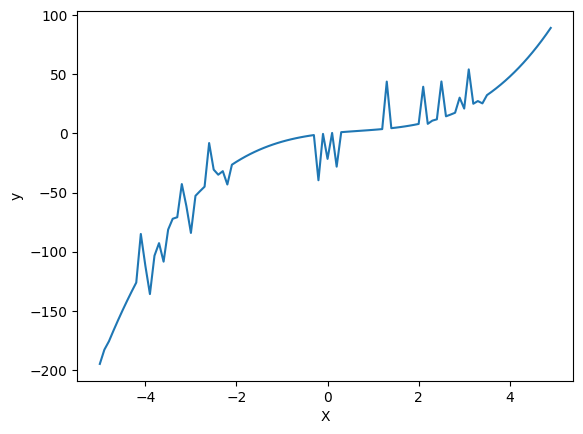

In [77]:
X_list = []
y_list = []

for i in range(100):
    x = i / 10 - 5
    X_list.append(x)
    rd = 0
    if (random.random() <= 0.1):
        rd = 40 * random.random()
    elif (0.1 < random.random() <= 0.2):
        rd = - 40 * random.random()

    y_list.append(x**3 - 2*x**2 + 4*x + rd)

plt.xlabel("X")
plt.ylabel("y")
plt.plot(X_list, y_list)
plt.show()

#X = torch.from_numpy(np.expand_dims(X_list, -1))
#y = torch.from_numpy(np.expand_dims(y_list, -1))
X = X_list
y = y_list
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

In [78]:
input_size = 1
output_size = 1

#model = nn.Linear(1, 1, dtype=torch.float64)

class Model(torch.nn.Module):
    def __init__(self, hidden_dim):
        super(Model, self).__init__()
        
        self.linear = nn.Sequential(
            torch.nn.Linear(input_size, hidden_dim),
            torch.nn.Linear(hidden_dim, output_size)
        )

    def forward(self, x):
        return self.linear(x)

optimizer = optim.Adam(model.parameters(), lr=0.05)
loss_fn = nn.MSELoss()

In [83]:
losses = []
n_neurons = [i for i in range(1, 100, 1)]
poly_degree = [i for i in range(1, 100, 1)]
    
for n in n_neurons:
    last_train_loss = sys.maxsize
    current_train_loss = sys.maxsize - 10

    model = Model(n)
    
    while last_train_loss - current_train_loss > 0.1:
        for i in range(len(X_train)):
            train = X_train[i]
            target = y_train[i]
            prediction = model(train)
            loss = loss_fn(prediction, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
        last_train_loss, current_train_loss = current_train_loss, loss.detach().numpy()

    test_predictions = model(X)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.plot(X.detach().numpy(), test_predictions.detach().numpy())
    plt.show()

    loss = loss_fn(test_predictions, y)
    print("Neuron Size : ", n, " ; Test Loss : ", loss.detach().numpy())
    losses.append(loss.detach().numpy())
    
    
plt.xlabel("Feature size")
plt.ylabel("Test loss (MSELoss)")
plt.plot(n_neurons, losses)
plt.show()

TypeError: linear(): argument 'input' (position 1) must be Tensor, not float